# <center>Demo on Hashing</center>

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [5]:
# Reading multiple images from a folder
folder = "./YALE"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)

In [6]:
# Vectorizing the images and storing it in a list
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Making it a unit vector
    image_vector.append(img_vec_norm)

## Locality Sensitive Hashing – Random Projections

In [7]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector    

In [8]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code   

In [9]:
hash_vector = genRandomHashVectors(20,len(image_vector[0]))

In [10]:
localSensitiveHashing(hash_vector,image_vector[0])

['1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [11]:
# Creating a Image Dictionary using the hash as the keys
image_dict = {}
for i in range(len(image_vector)):
    hash_code = localSensitiveHashing(hash_vector,image_vector[i])
    str_hash_code = ''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i)     

In [12]:
col_names = ["Hash_Codes","Image_Index"]
df = pd.DataFrame(image_dict.items(),columns=col_names)
df.head(30)

,Hash_Codes,Image_Index
0,11011000010001000000,[0]
1,10001001010101011100,[1]
2,11011001010001001000,"[2, 77]"
3,00011001010000011000,[3]
4,11011001010001011100,"[4, 131]"
5,11011011010100011000,[5]
6,10011011010101010000,[6]
7,11011001010110011000,[7]
8,11011011010001000100,[8]
9,10011001010101000100,[9]


In [10]:
# Getting the keys and values of the Dictionary
keys = list(image_dict.keys())
values = list(image_dict.values())

<ipython-input-11-ed9a248b4f98>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)


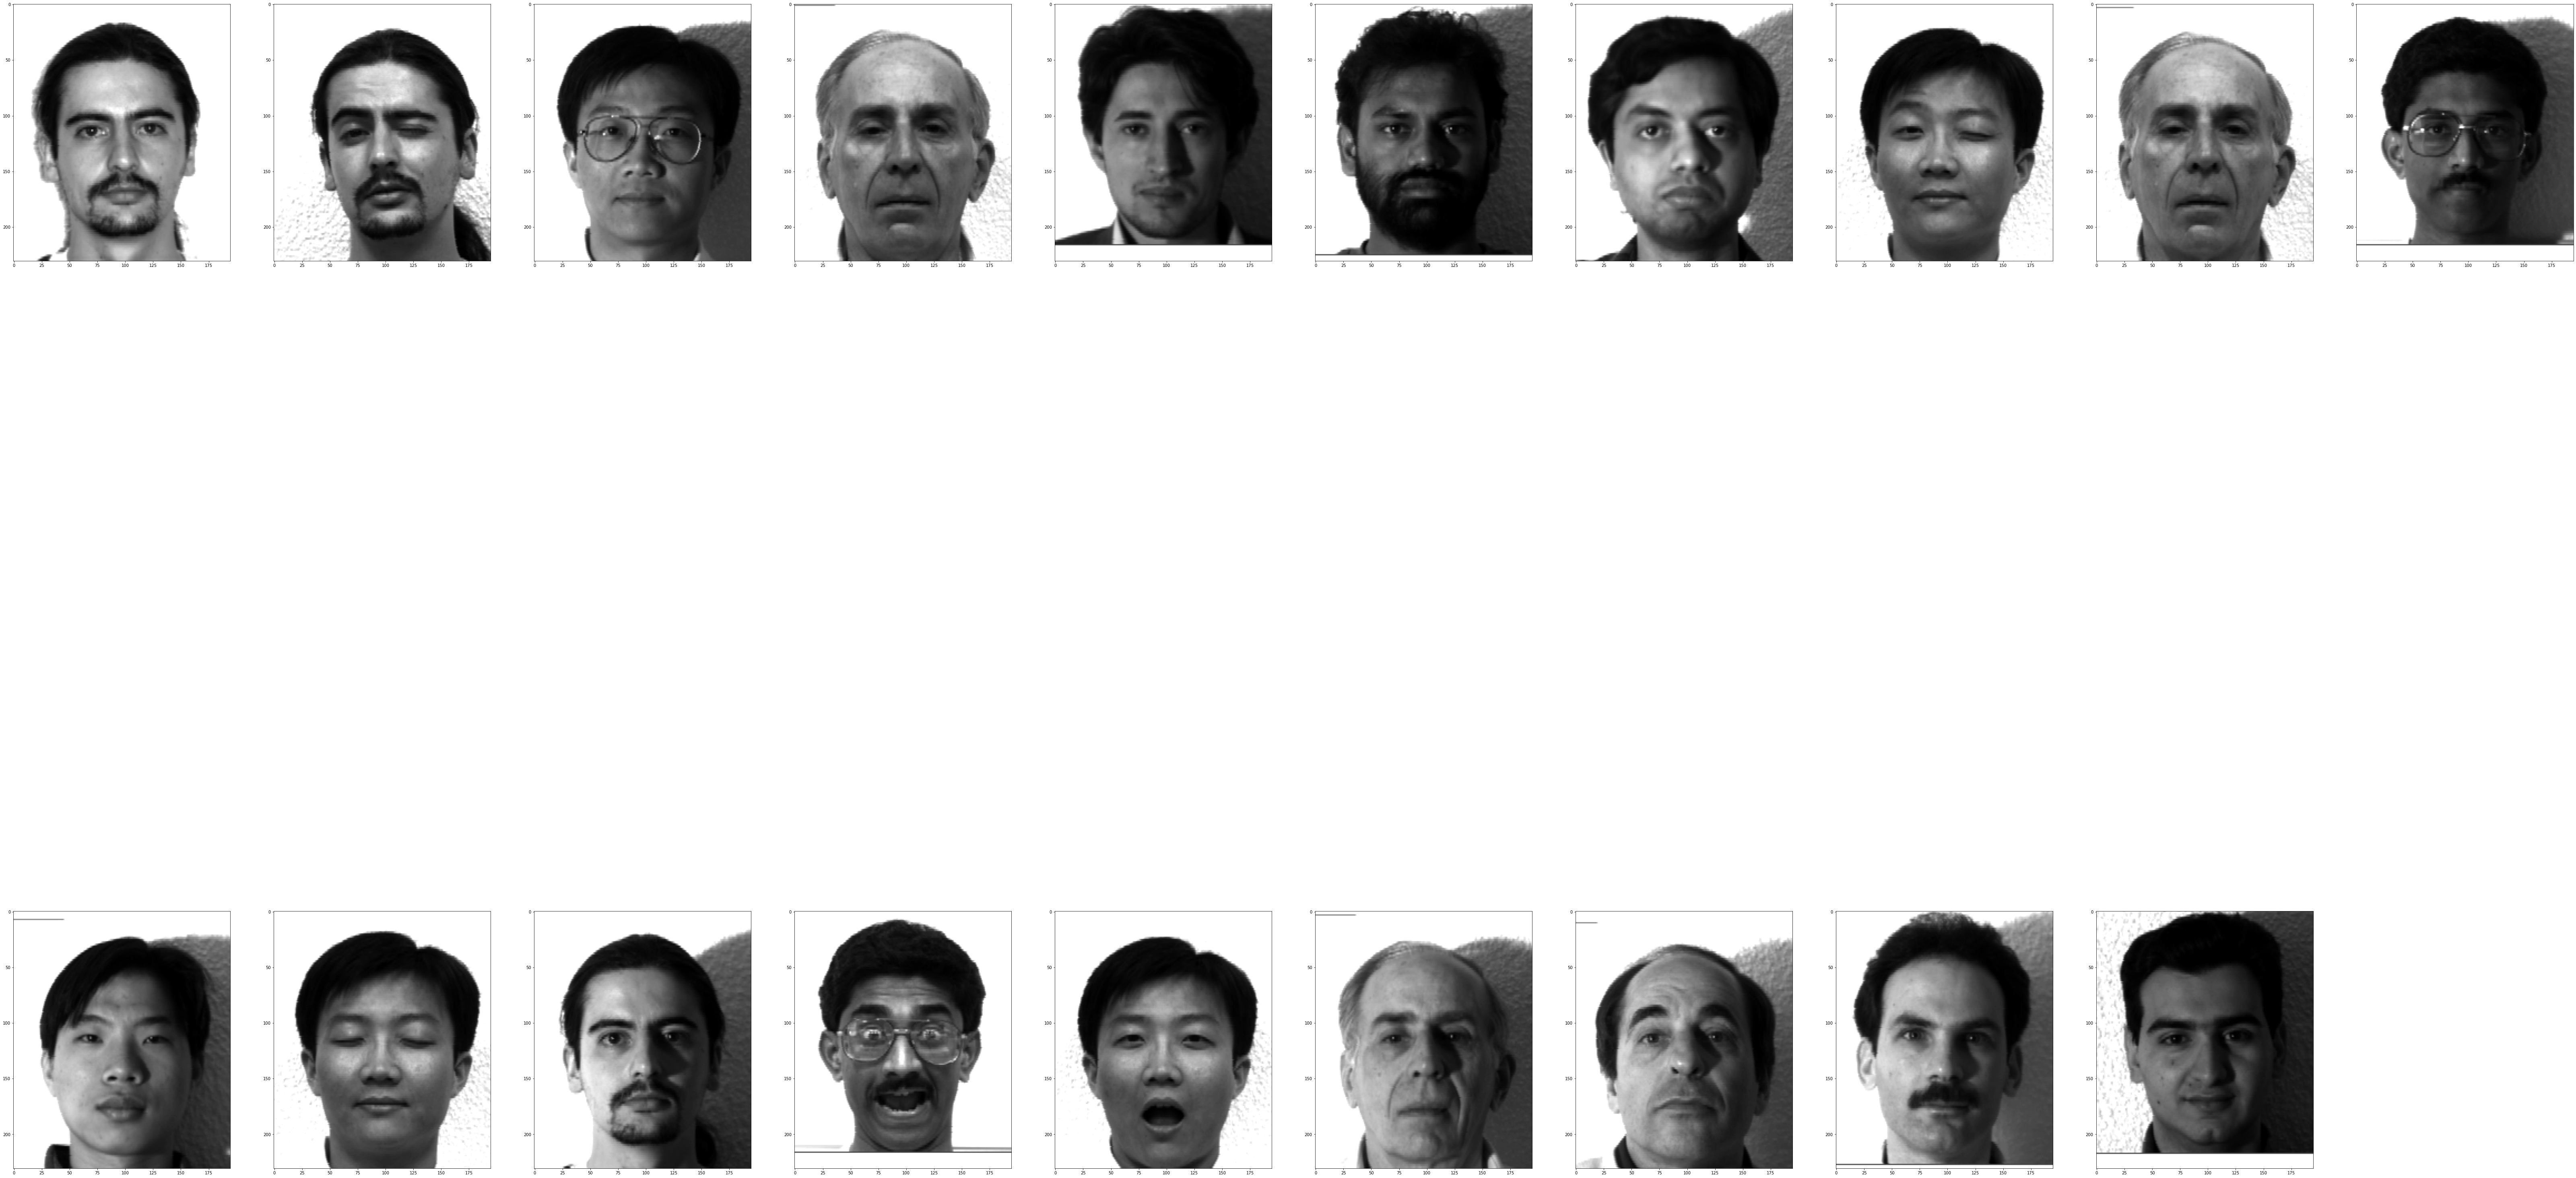

In [11]:
# Plotting images with same hash code
imgs = [images[i] for i in range(len(images)) if i in values[2]]
fig = plt.figure()
cols = 2
n_images = len(imgs)
for n,image in zip(range(n_images),imgs):
    ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
    plt.gray()
    plt.imshow(image)
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()